In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)

In [3]:
import cv2

In [8]:
video_ocr_paths = list(Path("../data/video_frame_obj").glob("*.csv"))

In [9]:
video_ocr_paths

[WindowsPath('../data/video_frame_obj/test_video_0.csv'),
 WindowsPath('../data/video_frame_obj/test_video_1.csv'),
 WindowsPath('../data/video_frame_obj/test_video_10.csv'),
 WindowsPath('../data/video_frame_obj/test_video_11.csv'),
 WindowsPath('../data/video_frame_obj/test_video_12.csv'),
 WindowsPath('../data/video_frame_obj/test_video_13.csv'),
 WindowsPath('../data/video_frame_obj/test_video_14.csv'),
 WindowsPath('../data/video_frame_obj/test_video_15.csv'),
 WindowsPath('../data/video_frame_obj/test_video_16.csv'),
 WindowsPath('../data/video_frame_obj/test_video_17.csv'),
 WindowsPath('../data/video_frame_obj/test_video_18.csv'),
 WindowsPath('../data/video_frame_obj/test_video_19.csv'),
 WindowsPath('../data/video_frame_obj/test_video_2.csv'),
 WindowsPath('../data/video_frame_obj/test_video_20.csv'),
 WindowsPath('../data/video_frame_obj/test_video_3.csv'),
 WindowsPath('../data/video_frame_obj/test_video_4.csv'),
 WindowsPath('../data/video_frame_obj/test_video_5.csv'),
 Wi

In [11]:
diff_df_dict = dict()
for video_ocr_path in video_ocr_paths:
    file_name = video_ocr_path.name.split(".")[0]
    diff_df_dict[file_name] = pd.read_csv(video_ocr_path)

In [28]:
diff_df = diff_df_dict['test_video_13']

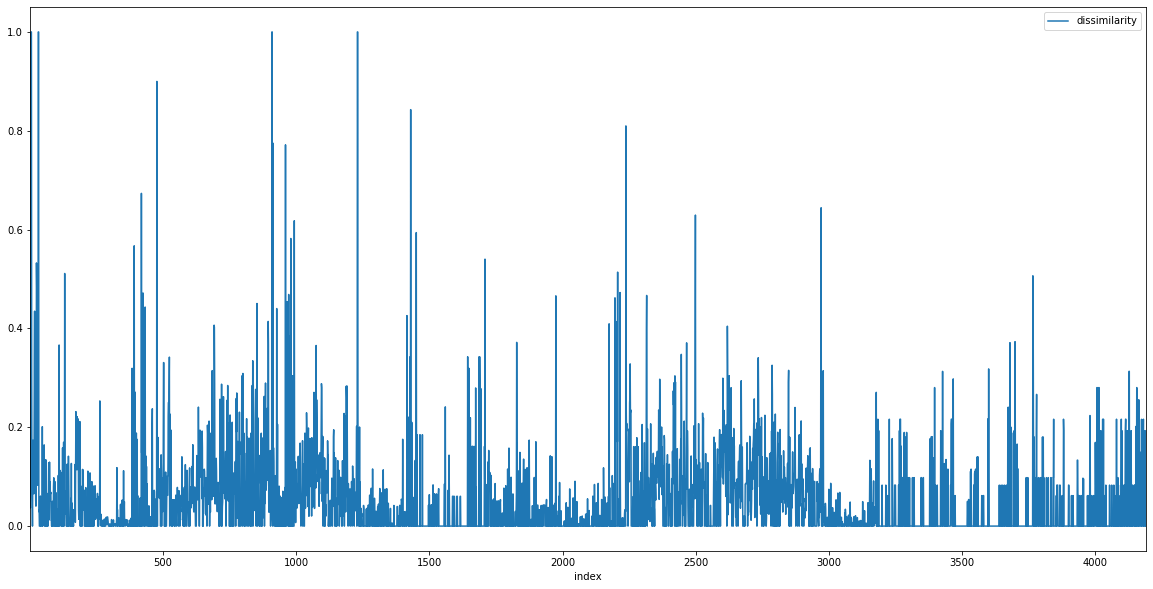

In [30]:
diff_df.plot(x='index', y='dissimilarity',figsize=(20,10))

In [31]:

print(diff_df.query("dissimilarity >= 0.2").shape)
diff_df.query("dissimilarity >= 0.2")

(260, 9)


,index,dissimilarity,jaccard,jaccard_letter,frame_token_ct,lev_dis,word_dis,letter_dissim,min
4,5,1.000000,1.000000,1.000000,3,6.000000,0.666667,1.000000,0.083333
5,6,1.000000,1.000000,1.000000,1,1.000000,0.500000,1.000000,0.100000
6,7,0.316941,0.666667,0.705882,2,0.705882,0.666667,0.705882,0.116667
16,17,0.328634,1.000000,0.666667,3,1.200000,0.333333,0.285714,0.283333
17,18,0.434872,1.000000,0.769231,2,0.727273,0.600000,0.545455,0.300000
24,25,0.532501,1.000000,0.625000,3,1.500000,0.333333,0.428571,0.416667
25,26,0.483262,1.000000,0.750000,2,0.833333,0.333333,0.333333,0.433333
26,27,0.207241,0.666667,0.714286,3,0.583333,0.400000,0.500000,0.450000
27,28,0.267759,0.625000,0.777778,5,0.761905,0.166667,0.428571,0.466667
29,30,0.235346,0.750000,0.708333,6,1.200000,0.333333,0.523810,0.500000


In [50]:
labels = {
    'test_video_0':[1,
 2,
 5,
 36,
 97,
 225,
 246,
 437,
 509,
 675,
 884,
 979,
 1166,
 1432,
 1617,
 1743,
 1897,
 2149,
 2251,
 2323,
 2672,
 2826,
 2870,
 2885,
 2896,
 2956,
 3072,
 3456,
 3461,
 3464,
 3467],
    'test_video_1': [10,
 38,
 65,
 116,
 212,
 241,
 481,
 615,
 631,
 686,
 767,
 784,
 805,
 867,
 1079,
 1252,
 1354,
 1460,
 1583,
 1621,
 1749,
 1763],
    'test_video_10':
    [6,
 19,
 22,
 27,
 28,
 36,
 55,
 206,
 287,
 345,
 422,
 486,
 621,
 679,
 726,
 754,
 831,
 859,
 885,
 896,
 934,
 950,
 1077,
 1097,
 1215,
 1275,
 1352,
 1378,
 1407,
 1503,
 1511,
 1545,
 1616,
 1673,
 1740,
 1767,
 1837,
 1947,
 1978,
 1999,
 2125,
 2162,
 2204,
 2314,
 2501,
 2517,
 2548,
 2601,
 2765,
 2840,
 3048,
 3097,
 3128],
    'test_video_11': [53,
 321,
 382,
 645,
 790,
 964,
 1018,
 1588,
 1621,
 1756,
 1826,
 2035,
 2100,
 2432,
 2522,
 2646,
 2723,
 2808,
 2847,
 2886,
 3011,
 3066,
 3349,
 3359,
 3364],
    'test_video_12': [32,
 74,
 136,
 178,
 224,
 265,
 397,
 517,
 643,
 709,
 824,
 1019,
 1264,
 1411,
 1602,
 1723,
 1998,
 2102,
 2281,
 2322,
 2439,
 2469,
 2577,
 2647,
 2717,
 2838,
 2898,
 2939,
 3110,
 3327,
 3432,
 3648,
 3754,
 4002,
 4325,
 4582,
 4713,
 4910,
 4944]
}

In [53]:
import json
with open('labels.json', 'w') as file:
    json.dump(labels, file)